# Road Accident Fatalities in Thailand (2024): Data Analysis

## Data Loading

### Objective:
In this step, we will load the dataset `road_accident_fatalities_2024.csv` into our Kaggle Notebook. This step involves:
1. Setting the data path.
2. Loading the dataset into a pandas DataFrame.
3. Displaying the first few rows of the dataset to understand its structure.

### Dataset Information:
- **Dataset Name**: `road_accident_fatalities_2024.csv`
- **File Path**: `/kaggle/input/thailand-road-accident-fatalities-2024/thailand_road_accident_fatalities_2024.csv`
- **Purpose**: This dataset contains information about road accident fatalities in Thailand for the year 2024. It will be used for analysis and modeling.

In [1]:
# Step 1: Data Loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define the data path
data_path = "/kaggle/input/thailand-road-accident-fatalities-2024/thailand_road_accident_fatalities_2024.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Display the first 5 rows of the dataset
df.head()

,age,sex,nationality,person_district,person_province,confirmed_death_date,acc_sub_district,acc_district,province_of_death,acc_lat,acc_long,cause_code,vehicle_type
0,49.0,ชาย,NaN,ขนอม,นครศรีธรรมราช,11/01/2567,ขนอม,ขนอม,นครศรีธรรมราช,99.857347,9.182572,V899,รถจักรยานยนต์
1,59.0,หญิง,NaN,พล,ขอนแก่น,13/03/2567,เมืองพล,พล,ขอนแก่น,NaN,NaN,V031,คนเดินเท้า
2,15.0,ชาย,NaN,บัวเชด,สุรินทร์,30/06/2567,ละลม,ภูสิงห์,ศรีสะเกษ,104.013630,14.567701,V892,รถจักรยานยนต์
3,19.0,ชาย,NaN,แม่สอด,ตาก,02/07/2567,หางน้ำสาคร,เมืองชัยนาท,ชัยนาท,100.180372,15.295001,V244,รถจักรยานยนต์
4,44.0,ชาย,NaN,ชานุมาน,อำนาจเจริญ,06/07/2567,ป่าก่อ,ชานุมาน,อำนาจเจริญ,NaN,NaN,Y349,ไม่ระบุพาหนะ


## Additional Data Overview
Below are additional commands to better understand the dataset's structure and contents:

In [2]:
# Display the dimensions of the dataset
print(f"Dataset Dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

# Display the data types and missing value counts
print("\nDataset Info:")
df.info()

# Check for missing values in each column
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Display the number of unique values in each column
print("\nNumber of Unique Values per Column:")
print(df.nunique())

Dataset Dimensions: 12762 rows and 13 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12762 entries, 0 to 12761
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   12669 non-null  float64
 1   sex                   12762 non-null  object 
 2   nationality           4352 non-null   object 
 3   person_district       5284 non-null   object 
 4   person_province       5293 non-null   object 
 5   confirmed_death_date  12762 non-null  object 
 6   acc_sub_district      6005 non-null   object 
 7   acc_district          12762 non-null  object 
 8   province_of_death     12762 non-null  object 
 9   acc_lat               3246 non-null   float64
 10  acc_long              3246 non-null   float64
 11  cause_code            11253 non-null  object 
 12  vehicle_type          12762 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.3+ MB

Missing Val

## Summary of Columns Suitable for Analysis

### Columns Ready for Immediate Use:
These columns are clean or require minimal preprocessing, making them ready for analysis:
- **`age`**: After handling missing values.
- **`sex`**: Fully populated and ready for use.
- **`confirmed_death_date`**: Suitable for analysis and feature extraction (e.g., `year`, `month`).
- **`acc_district`**: Clean and ready for use.
- **`province_of_death`**: Clean and ready for use.
- **`vehicle_type`**: Fully populated and categorized.


### Columns Potentially Usable (Require Missing Value Handling):
These columns can be utilized after proper handling of missing values or additional preprocessing:
- **`nationality`**: Requires missing values to be filled (e.g., with "Unknown").
- **`person_district`** and **`person_province`**: Can be combined into a single feature or handled individually after addressing missing values.
- **`acc_sub_district`**: Requires significant missing value handling.
- **`cause_code`**: Requires missing values to be filled or grouped for better usability.


### Columns Less Suitable for Analysis:
These columns present challenges due to a high proportion of missing values, making them less reliable for analysis:
- **`acc_lat`** and **`acc_long`**: High number of missing values limits their usability for spatial analysis.


In [3]:
# Display the first 5 rows of columns that are suitable for analysis
usable_columns = ['age', 'sex', 'confirmed_death_date', 'acc_district', 
                  'province_of_death', 'vehicle_type']

# Display the header of usable columns
df[usable_columns].head()

,age,sex,confirmed_death_date,acc_district,province_of_death,vehicle_type
0,49.0,ชาย,11/01/2567,ขนอม,นครศรีธรรมราช,รถจักรยานยนต์
1,59.0,หญิง,13/03/2567,พล,ขอนแก่น,คนเดินเท้า
2,15.0,ชาย,30/06/2567,ภูสิงห์,ศรีสะเกษ,รถจักรยานยนต์
3,19.0,ชาย,02/07/2567,เมืองชัยนาท,ชัยนาท,รถจักรยานยนต์
4,44.0,ชาย,06/07/2567,ชานุมาน,อำนาจเจริญ,ไม่ระบุพาหนะ


## Issue with Original `confirmed_death_date` Format in Pandas

### Problem:
The `confirmed_death_date` column contains dates in the **Buddhist Era (BE)** format, such as `11/01/2567`. Pandas does not natively support the BE format, as it expects dates in the **Gregorian Calendar (CE)** format. This results in parsing errors when attempting to convert the date strings to `datetime` objects.

### Why This is a Problem:
- **Year Offset**: The year in BE is 543 years ahead of the Gregorian year, meaning `2567 BE` corresponds to `2024 CE`.
- **Parsing Error**: Without converting the year, `pd.to_datetime` will either fail or produce incorrect results.

### Solution:
The year in the date strings must be adjusted (subtract 543) before converting to a pandas `datetime` object. This ensures compatibility with pandas and allows for date-based operations, such as extracting months, years, or performing time-series analysis.

In [4]:
# Step 1: Convert confirmed_death_date to Gregorian Date (CE)
df['confirmed_death_date'] = pd.to_datetime(
    df['confirmed_death_date'].apply(lambda x: x.replace('2567', '2024')),
    format='%d/%m/%Y'
)

# Step 2: Update usable_columns with the transformed data
usable_columns = ['age', 'sex', 'confirmed_death_date', 'acc_district', 
                  'province_of_death', 'vehicle_type']

# Display the first 5 rows of the updated usable columns
df[usable_columns].head()

,age,sex,confirmed_death_date,acc_district,province_of_death,vehicle_type
0,49.0,ชาย,2024-01-11,ขนอม,นครศรีธรรมราช,รถจักรยานยนต์
1,59.0,หญิง,2024-03-13,พล,ขอนแก่น,คนเดินเท้า
2,15.0,ชาย,2024-06-30,ภูสิงห์,ศรีสะเกษ,รถจักรยานยนต์
3,19.0,ชาย,2024-07-02,เมืองชัยนาท,ชัยนาท,รถจักรยานยนต์
4,44.0,ชาย,2024-07-06,ชานุมาน,อำนาจเจริญ,ไม่ระบุพาหนะ


### Objective:
To enhance the dataset, we will create a new column called `season` based on the `confirmed_death_date`. This column will categorize each date into a season (`Winter`, `Summer`, `Rainy`) based on the typical seasonal patterns in Thailand.

In [5]:
# Step 1: Define a function to assign seasons based on the month
def get_season(month):
    if month in [11, 12, 1]:  # Winter (November - January)
        return 'Winter'
    elif month in [2, 3, 4, 5]:  # Summer (February - May)
        return 'Summer'
    else:  # Rainy (June - October)
        return 'Rainy'

# Step 2: Create the `season` column based on `confirmed_death_date`
df['season'] = df['confirmed_death_date'].dt.month.apply(get_season)

# Step 3: Update usable_columns to include `season`
usable_columns = ['age', 'sex', 'confirmed_death_date', 'acc_district', 
                  'province_of_death', 'vehicle_type', 'season']

# Step 4: Display the first 5 rows of the updated usable columns
df[usable_columns].head()

,age,sex,confirmed_death_date,acc_district,province_of_death,vehicle_type,season
0,49.0,ชาย,2024-01-11,ขนอม,นครศรีธรรมราช,รถจักรยานยนต์,Winter
1,59.0,หญิง,2024-03-13,พล,ขอนแก่น,คนเดินเท้า,Summer
2,15.0,ชาย,2024-06-30,ภูสิงห์,ศรีสะเกษ,รถจักรยานยนต์,Rainy
3,19.0,ชาย,2024-07-02,เมืองชัยนาท,ชัยนาท,รถจักรยานยนต์,Rainy
4,44.0,ชาย,2024-07-06,ชานุมาน,อำนาจเจริญ,ไม่ระบุพาหนะ,Rainy


---

## Data Cleaning and Preparation

### Objective:
To ensure the dataset is clean and ready for analysis, this step focuses on:
1. Handling missing values.
2. Transforming data types for consistency and usability.
3. Creating new features to enhance analytical capabilities.

### Actions:

#### 1. Handling Missing Values:
- **`age`**: Fill missing values with the median age to avoid data distortion.
- **Other Columns**: Ensure no missing values in other `usable_columns`.

#### 2. Transforming Data Types:
- Ensure the `confirmed_death_date` column is in the `datetime` format for time-based analysis.

#### 3. Creating New Features:
- The `season` column is already added, based on the month extracted from `confirmed_death_date`.

In [6]:
# Step 1: Handle Missing Values
# Fill missing values in the 'age' column with the median age
df['age'] = df['age'].fillna(df['age'].median())

# Step 2: Ensure 'confirmed_death_date' is in datetime format
df['confirmed_death_date'] = pd.to_datetime(df['confirmed_death_date'], format='%Y-%m-%d')

# Step 3: Ensure no missing values in 'usable_columns'
for column in usable_columns:
    if df[column].isnull().sum() > 0:
        print(f"Column '{column}' still has missing values.")

# Step 4: Verify the dataset is clean
print("Dataset Info After Cleaning:")
df[usable_columns].info()

# Check for missing values in each column
print("\nMissing Values Summary:")
print(df.isnull().sum())

df[usable_columns].head()

Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12762 entries, 0 to 12761
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   age                   12762 non-null  float64       
 1   sex                   12762 non-null  object        
 2   confirmed_death_date  12762 non-null  datetime64[ns]
 3   acc_district          12762 non-null  object        
 4   province_of_death     12762 non-null  object        
 5   vehicle_type          12762 non-null  object        
 6   season                12762 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 698.0+ KB

Missing Values Summary:
age                        0
sex                        0
nationality             8410
person_district         7478
person_province         7469
confirmed_death_date       0
acc_sub_district        6757
acc_district               0
province_of

,age,sex,confirmed_death_date,acc_district,province_of_death,vehicle_type,season
0,49.0,ชาย,2024-01-11,ขนอม,นครศรีธรรมราช,รถจักรยานยนต์,Winter
1,59.0,หญิง,2024-03-13,พล,ขอนแก่น,คนเดินเท้า,Summer
2,15.0,ชาย,2024-06-30,ภูสิงห์,ศรีสะเกษ,รถจักรยานยนต์,Rainy
3,19.0,ชาย,2024-07-02,เมืองชัยนาท,ชัยนาท,รถจักรยานยนต์,Rainy
4,44.0,ชาย,2024-07-06,ชานุมาน,อำนาจเจริญ,ไม่ระบุพาหนะ,Rainy


---

## Exploratory Data Analysis (EDA)

### Objective:
Perform EDA to uncover trends, patterns, and anomalies in the dataset. This includes:
1. Statistical Analysis of numerical and categorical columns.
2. Visualization of trends and relationships between variables.

### Statistical Analysis:
#### **Numerical Columns**
##### **Description**:
Calculate summary statistics for numerical columns, such as:
- **Mean**: Average value.
- **Median**: Middle value.
- **Standard Deviation**: Measure of spread.
- **Minimum and Maximum Values**: Range of data.

#### **Purpose**:
Understand the distribution and key metrics of numerical data, particularly `age`, to identify trends, anomalies, and overall data structure.

In [7]:
# Basic statistics for numerical columns
numerical_columns = ['age']
print("Summary Statistics for Numerical Columns:")
print(df[numerical_columns].describe())

Summary Statistics for Numerical Columns:
                age
count  12762.000000
mean      43.282949
std       19.739808
min        0.000000
25%       27.000000
50%       43.000000
75%       59.000000
max       97.000000


#### **Categorical Columns**
##### **Description:**
For categorical columns, calculate:

Unique Values: Number of distinct categories.
Most Frequent Value: The mode or the category with the highest frequency.
Value Counts: Frequency distribution of each category.
Purpose:
Understand the diversity, balance, and dominant categories in categorical data, such as sex

In [8]:
# Separate categorical columns from usable_columns
categorical_columns = ['sex', 'confirmed_death_date', 'acc_district', 'province_of_death', 'vehicle_type', 'season']

# Basic statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Unique Values: {df[column].nunique()}")
    print(f"Most Frequent Value: {df[column].mode()[0]}")
    print(f"Value Counts:\n{df[column].value_counts()}\n")


Summary Statistics for Categorical Columns:
Column: sex
Unique Values: 2
Most Frequent Value: ชาย
Value Counts:
sex
ชาย     9786
หญิง    2976
Name: count, dtype: int64

Column: confirmed_death_date
Unique Values: 274
Most Frequent Value: 2024-01-01 00:00:00
Value Counts:
confirmed_death_date
2024-01-01    95
2024-04-13    90
2024-04-17    74
2024-04-15    74
2024-02-24    71
              ..
2024-04-27    31
2024-07-23    30
2024-08-26    29
2024-05-30    28
2024-07-21    27
Name: count, Length: 274, dtype: int64

Column: acc_district
Unique Values: 925
Most Frequent Value: เมืองนครราชสีมา
Value Counts:
acc_district
เมืองนครราชสีมา     254
เมืองระยอง          207
เมืองอุบลราชธานี    190
เมืองขอนแก่น        174
เมืองชลบุรี         150
                   ... 
จะแนะ                 1
ดอนพุด                1
เนินสง่า              1
เกาะยาว               1
คีรีรัฐนิคม           1
Name: count, Length: 925, dtype: int64

Column: province_of_death
Unique Values: 77
Most Frequent Value: นครราช

#### Outlier Detection for Numerical Columns

##### **Description**:
- Identify outliers in numerical columns using statistical methods.
- For `age`, outliers are values that fall outside the typical range determined by the Interquartile Range (IQR).

##### **Purpose**:
Outliers can significantly affect analysis and modeling by skewing results. Detecting and handling outliers ensures the data's reliability and improves the performance of statistical and machine learning models.

#### **Method**:
##### Interquartile Range (IQR):
- **Q1 (25th Percentile)**: The value below which 25% of the data lies.
- **Q3 (75th Percentile)**: The value below which 75% of the data lies.
- **IQR**: The difference between Q3 and Q1.
- **Outlier Range**:
  - Lower Bound: `Q1 - 1.5 * IQR`
  - Upper Bound: `Q3 + 1.5 * IQR`
- Values outside this range are considered outliers.

In [9]:
# Loop through numerical columns explicitly from usable_columns
numerical_columns = ['age']  # Specify numerical columns explicitly

for col in numerical_columns:
    if col in df.columns:  # Ensure the column exists in the dataset
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        # Define outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Print the results for the column
        print(f"Outliers in '{col}':")
        if not outliers.empty:
            # Display outliers along with other usable_columns for context
            print(outliers[usable_columns])
        else:
            print("No outliers found.\n")
    else:
        print(f"Column '{col}' does not exist in the dataset.\n")

Outliers in 'age':
No outliers found.



#### Correlation Analysis for Numerical Columns

##### **Description**:
- Correlation analysis helps evaluate relationships between numerical variables to uncover dependencies or associations.
- In this case, we analyze the correlation of `age` with other numerical variables (if applicable).

##### **Purpose**:
Understanding the correlation between numerical variables can help identify:
- Positive or negative relationships.
- Variables that may contribute significantly to trends or patterns in the dataset.

#### **Method**:
##### Correlation Coefficient:
- **Value Range**: 
  - `+1`: Perfect positive correlation (variables move in the same direction).
  - `0`: No correlation (variables are independent).
  - `-1`: Perfect negative correlation (variables move in opposite directions).
- The correlation coefficient is calculated using Pearson's method (default in pandas).

In [10]:
# Correlation analysis for numerical columns
correlation_matrix = df[['age']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
     age
age  1.0


### **Key Visualizations**:
#### **1. Distribution of Age**
- **Purpose**: To understand the distribution of ages among individuals involved in accidents.
- **Visualization**: Histogram.
- **Insights**: Identify the most common age range and detect any skewness or anomalies.

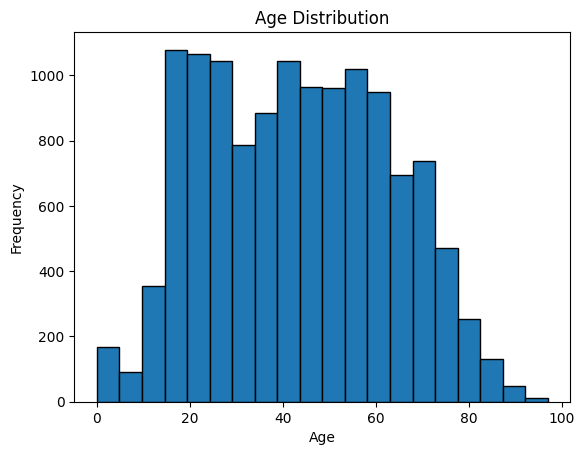

In [11]:
# Histogram for age distribution
plt.hist(df['age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### **2. Distribution by Gender (Sex)**
- **Purpose:** To visualize the proportion of individuals by gender (Male and Female).
- **Visualization:** Bar Plot or Pie Chart.
- **Insights:** Understand if one gender is more frequently involved in accidents.

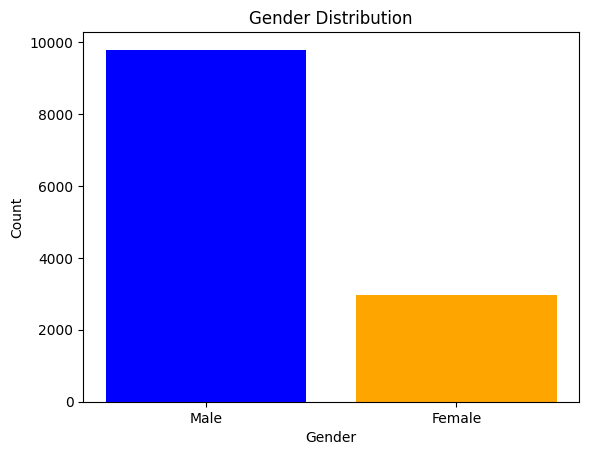

In [12]:
# Prepare data
gender_counts = df['sex'].value_counts().reset_index()
gender_counts.columns = ['sex', 'count']

# Replace Thai labels with English
gender_counts['sex'] = gender_counts['sex'].replace({'ชาย': 'Male', 'หญิง': 'Female'})

# Plot the data
plt.bar(
    gender_counts['sex'],  # Gender categories in English
    gender_counts['count'],  # Counts
    color=['blue', 'orange']  # Custom bar colors
)

# Add titles and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()


### **3. Seasonal Trends in Accidents**
- **Purpose:** To analyze the frequency of accidents in each season (Winter, Summer, Rainy).
- **Visualization:** Bar Plot.
- **Insights:** Identify which season has the highest or lowest accident rates.

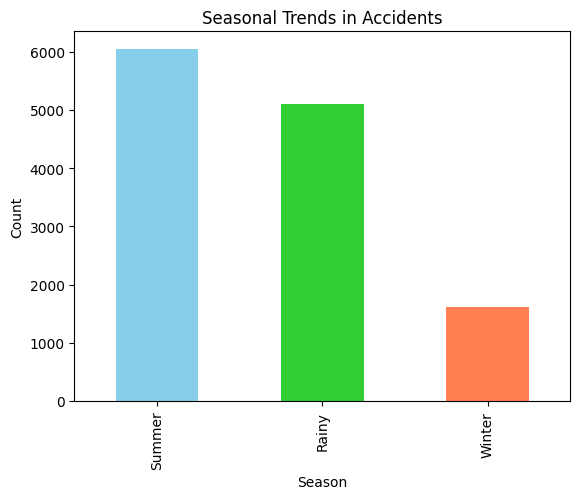

In [13]:
# Bar plot for seasonal trends
df['season'].value_counts().plot(kind='bar', color=['skyblue', 'limegreen', 'coral'])
plt.title('Seasonal Trends in Accidents')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

#### **4. Vehicle Type Involvement**
- **Purpose:** To analyze the frequency of accidents involving different vehicle types.
- **Visualization:** Bar Plot.
- **Insights:** Understand which vehicle type is most commonly involved in accidents.

In [14]:
import altair as alt

# Prepare data
vehicle_counts = df['vehicle_type'].value_counts().reset_index()
vehicle_counts.columns = ['vehicle_type', 'count']

# Example: Horizontal bar plot with Altair and font size customization
chart = alt.Chart(vehicle_counts).mark_bar(color='purple').encode(
    x=alt.X('count', 
            title='Count', 
            axis=alt.Axis(labelFontSize=14, titleFontSize=16)),  # Horizontal axis for Count
    y=alt.Y('vehicle_type', 
            sort='-x', 
            title='Vehicle Type', 
            axis=alt.Axis(labelFontSize=14, titleFontSize=16))  # Vertical axis for Vehicle Type
).properties(
    title=alt.TitleParams(
        text='Accidents by Vehicle Type', 
        fontSize=18  # Customize chart title font size
    ),
    width=600,
    height=400
)

chart.display()

alt.Chart(...)

### **5. Trends Over Time**
- **Purpose:** To visualize the trend of accidents over time, grouped by months or years.
- **Visualization:** Line Plot.
- **Insights:** Detect patterns in accident frequency over time.

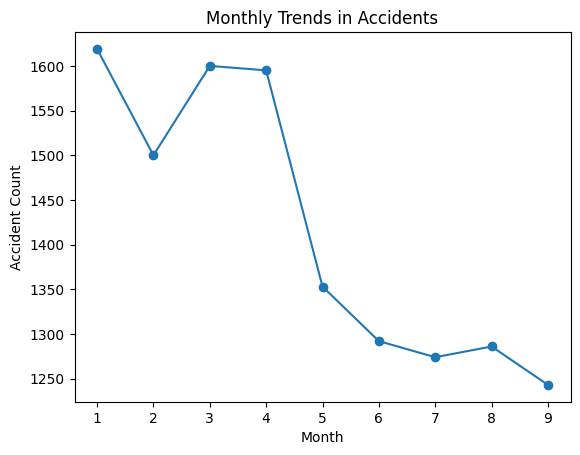

In [15]:
# Line plot for trends over time
df['month'] = df['confirmed_death_date'].dt.month  # Extract month from date
monthly_trends = df.groupby('month').size()
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Trends in Accidents')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.show()

### **6. Accident Locations**
- **Purpose:** To analyze the frequency of accidents by district (acc_district) or province (province_of_death).
- **Visualization:** Bar Plot.
- **Insights:** Identify high-risk locations.

In [16]:
import altair as alt

# Check if the 'acc_district' column exists and is not empty
if 'acc_district' in df.columns and not df['acc_district'].isnull().all():
    # Prepare data: Get the top 10 districts with the most accidents
    district_counts = df['acc_district'].value_counts().head(10).reset_index()
    district_counts.columns = ['district', 'count']  # Rename columns for clarity

    # Create Horizontal Bar Plot with Gradient Color using Altair
    chart = alt.Chart(district_counts).mark_bar().encode(
        x=alt.X('count', 
                title='Accident Count', 
                axis=alt.Axis(labelFontSize=14, titleFontSize=16)),  # Font size for labels and title
        y=alt.Y('district', 
                sort='-x', 
                title='District', 
                axis=alt.Axis(labelFontSize=14, titleFontSize=16)),  # Font size for labels and title
        color=alt.Color('count', scale=alt.Scale(scheme='yelloworangebrown'), title='Accident Count')  # Valid scheme
    ).properties(
        title=alt.TitleParams(
            text='Top 10 Districts with Most Accidents', 
            fontSize=18),  # Font size for chart title
        width=600,   # Updated width
        height=400   # Updated height
    )

    # Show the plot
    chart.display()
else:
    print("The 'acc_district' column does not exist or contains no valid data.")

alt.Chart(...)

---

## Summary of EDA Results for the Traffic Accident Project



### 1. Age Distribution
- The distribution of ages involved in accidents is almost uniform for the majority of age groups.
- Peaks are observed in individuals aged between **20-40 years**, indicating higher involvement in accidents.



### 2. Gender Distribution
- Males are significantly more involved in accidents compared to females.
- Male participants dominate the dataset with over **10,000 cases**, while females account for less than **3,000 cases**.



### 3. Seasonal Trends in Accidents
- The highest number of accidents occurred during the **summer season**.
- The **rainy season** follows, with a notable drop in accidents during the **winter season**.
- Summer accidents suggest possible risks associated with higher traffic or weather conditions.



### 4. Accidents by Vehicle Type
- **Motorcycles** dominate as the vehicle type most commonly involved in accidents, accounting for over **6,000 cases**.
- **Passenger cars** are the second most frequent, followed by other types like public transport and trucks.
- Pedestrians and cyclists appear to have much lower accident counts.



### 5. Monthly Trends in Accidents
- The first four months (**January, February, March, April**) show the highest accident counts.
- There is a steady decline in accidents from **April onwards**, with **September** having the lowest count in the analyzed months.



### 6. Top 10 Districts with Most Accidents
- **Mueang districts** in multiple provinces report the highest number of accidents.
- The **top district** has over **250 accidents**, while others range between **150-200 accidents**.
- This highlights urban areas as high-risk zones for road traffic accidents.





### Key Findings
1. **Demographics**: Young males, especially those in the age group 20-40 years, are more likely to be involved in accidents.
2. **Seasonal Risks**: Summer and rainy seasons are the most dangerous, possibly due to increased travel or weather conditions.
3. **Vehicle Type**: Motorcycles have the highest risk, underscoring the need for targeted safety measures.
4. **Geography**: Urban areas, especially central districts, are hotspots for road accidents.



### Recommendations
1. **Safety Campaigns**:
   - Focus on **motorcycle safety** and education for younger age groups.
   - Seasonal campaigns during the summer and rainy seasons to address risks.

2. **Infrastructure**:
   - Improve road safety measures in urban and high-traffic districts.
   - Consider better lighting, signage, and traffic control in high-accident zones.

3. **Policy Measures**:
   - Enforce stricter helmet and seatbelt laws.
   - Deploy targeted law enforcement during high-accident months (January-March).
